In [271]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
from scipy.spatial.distance import cosine

#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42) # note that you must use the same seed to ensure consistentcy in your training/validation/testing
tf.random.set_seed(42)
from sklearn.datasets import load_files 
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm
import shutil


In [11]:
data_dir = "./anti-deepfake-data and code/data"
img_height = 256 
img_width = 256

In [6]:
model = tf.keras.models.load_model('mymodel.h5')

In [81]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = data_dir,
    label_mode = 'categorical',
    batch_size=32,
    image_size= (img_height,img_width),
)

Found 8079 files belonging to 2 classes.


In [183]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/image_bucketing',
    batch_size=32,
    image_size= (img_height,img_width),
    shuffle=False
)

for i in validation_set:
    for u in i:
        # print(u)
        # image = tf.keras.utils.array_to_img(
        #     u[0], data_format=None, scale=True, dtype=None
        # )
        # display(image)
        # print(u)
        try:
            print(u[0][0][0][0].numpy())
        except:
            continue
        # print(model.predict(i[0][0]))

Found 1008 files belonging to 4 classes.
88.0
203.0
123.0
179.0
57.0
100.0
101.0
50.0
99.0
99.0
65.0
68.0
16.0
134.0
159.0
84.0
61.0
122.0
93.0
104.0
97.0
83.0
129.0
159.0
95.0
41.0
92.0
98.0
27.0
95.0
119.0
66.0


In [172]:
u[0][0][0][0].numpy()

88.0

In [197]:
certain_files = []
uncertain_files = []
certain_preds = []
uncertain_preds = []
root = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/authentic/Beijing'

for count, file in enumerate(os.listdir(root)):
    
    if count % 10 == 0:
        print(count, end=', ')
    
    if 'ipynb' in file:
        continue
    filename = root + '/' + file
    
    image = tf.keras.utils.load_img(
        filename,
        grayscale=False,
        color_mode='rgb',
        target_size=None,
        interpolation='nearest'
    )
    
    image_arr = tf.keras.utils.img_to_array(image)
    pred = (model.predict(np.array([image_arr]))[0][1])
    
    if pred > 0.99 or pred < 0.01:
        certain_files.append(file)
        certain_preds.append(pred)
    else:
        uncertain_files.append(file)
        uncertain_preds.append(pred)

0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 

892 0.00049880886
116 0.14550248


<AxesSubplot:ylabel='Count'>

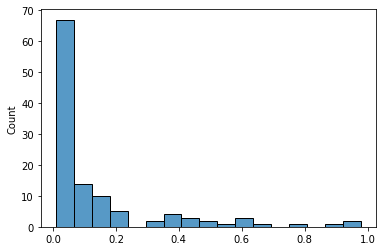

In [200]:
print(len(certain_files), np.average(certain_preds))
print(len(uncertain_files), np.average(uncertain_preds))
sns.histplot(uncertain_preds)

anti-deepfake-data and code/data/fake/Beijing_style/10454_22959.jpg
3.8518497e-06


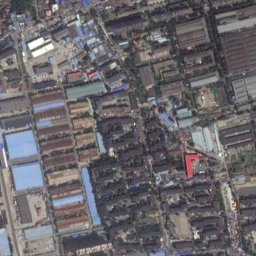

In [206]:
root = "anti-deepfake-data and code/data/fake/Beijing_style"

count = 0
for file in os.listdir(root):
    filename = root + '/' + file
    print(filename)

    
    image_arr = tf.keras.utils.img_to_array(image)
    pred = (model.predict(np.array([image_arr]))[0][1])
    
    if pred > 0.9 or pred < .1:
        print(pred)
        display(image)
        break
    
    # if count >= 10:
    #     break
    # count += 1

In [70]:
image?d

Type:            PngImageFile
String form:     <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x21646FF9040>
File:            c:\users\whetz\anaconda3\lib\site-packages\pil\pngimageplugin.py
Docstring:       <no docstring>
Class docstring: Base class for image file format handlers.


In [34]:
print(len(preds))
len(preds[np.where((preds > 0.95) | (preds < 0.05))])

807


751

In [ ]:
10458_22959

In [252]:
obvious_file = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/fake/Beijing_style/10458_22959.jpg'
obvious_file2 = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/fake/Beijing_style/10454_22989.jpg'
non_obvious_file = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/fake/Beijing_style/10454_22967.jpg'

def jpg_to_arr(filename):
    image = tf.keras.utils.load_img(
        filename,
        grayscale=False,
        color_mode='rgb',
        target_size=None,
        interpolation='nearest'
    )

    image_arr = tf.keras.utils.img_to_array(image)
    return image_arr

image_arr = np.ndarray.flatten(jpg_to_arr(obvious_file))
image_arr2 = np.ndarray.flatten(jpg_to_arr(obvious_file2))
image_arr3 = np.ndarray.flatten(jpg_to_arr(non_obvious_file))

In [277]:
obvious_arr = np.ndarray.flatten(jpg_to_arr(obvious_file))

dists = []
root = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/fake/Beijing_style/'
print(len(os.listdir(root)))
for count, file in enumerate(os.listdir(root)):
    if count % 10 == 0:
        print(count, end=', ')
    
    filename = root + '/' + file
    
    arr = np.ndarray.flatten(jpg_to_arr(filename))
    
    dist = cosine(obvious_arr, arr)
    dists.append(dist)
    
    if dist < 0.01:
        target = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/filtered_data/fake/Beijing_style/'+file+'.jpg'
        shutil.copyfile(filename, target)
        break


2016
0, 

<AxesSubplot:ylabel='Count'>

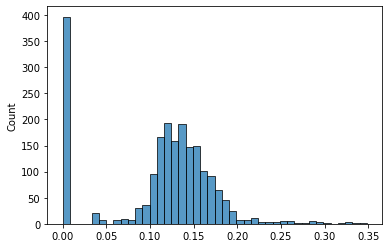

In [267]:
sns.histplot(dists)

In [ ]:
root = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/fake'
obvious_file = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/fake/Beijing_style/10458_22959.jpg'
obvious_file2 = 'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/anti-deepfake-data and code/data/fake/Seattle_style/10454_22982.jpg'

obvious_arr = np.ndarray.flatten(jpg_to_arr(obvious_file))
obvious_arr2 = np.ndarray.flatten(jpg_to_arr(obvious_file2))

for city in os.listdir(root):
    print(f'\n\n{city}')
    
    for count, file in enumerate(os.listdir(f"{root}/{city}")):
        if 'ipynb' in file:
            continue
        if count % 10 == 0:
            print(count, end=', ')

        filename = F"{root}/{city}/{file}"

        arr = np.ndarray.flatten(jpg_to_arr(filename))
        
        dist_flag = True
        for obv_arr in [obvious_arr, obvious_arr2]:
            dist = cosine(obv_arr, arr)
            if dist < 0.01:
                dist_flag = False
                break

        if dist_flag:
            target = F'C:/Users/whetz/Documents/UVA MSDS/DS 6050/Final Project/Deepfakes/filtered_data/fake/{city}/{file}.jpg'
            shutil.copyfile(filename, target)



Beijing_style
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 